In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as  np
import pandas as pd

In [2]:
plt.rcParams["figure.figsize"] = (12,8) # config figure size

In [3]:
def read_power_data(filename):
     with open(filename, "r") as f:
        headers = list(f.readline().strip().split(","))
        data = []
        f.readline()
        for line in f:
            values = list(map(float, line.split(",")))
            data.append(values)
        df = pd.DataFrame(data=data, columns=headers)
        return df

def read_regions_data(filename):
     with open(filename, "r") as f:
        headers = list(f.readline().strip().split(","))
        data = []
        for line in f:
            values = line.split(",")
            values[2] = float(values[2])
            values[3] = float(values[3])
            values[4] = float(values[4])
            data.append(values)
        df = pd.DataFrame(data=data, columns=headers)
        return df
    
def get_energy(region_df):
    view = region_df.loc[region_df['name'] == "computation"]
    return np.mean(view['energy(J)']), np.std(view['energy(J)'])

def get_time(region_df):
    view = region_df.loc[region_df['name'] == "computation"]
    return np.mean(view['end'] - view['start']), np.std(view['end'] - view['start'])

def power_graph(dataframe, title, regions):
    x_axis = dataframe['timestamp']-dataframe['timestamp'][0]
    plt.plot(x_axis, dataframe['power(W)'], label="Power (W)")
    plt.xlabel("Time (s)")
    plt.ylabel("Power (W)")
    
    for index, region in regions.iterrows():
        if region['name'] == "data_init":
            plt.fill_between(
                    x=x_axis,
                    y1=dataframe['power(W)'], 
                    where= dataframe['timestamp'].between(region['start'], region['end']),
                    color= "b",
                    alpha=0.2)
        else:
            plt.fill_between(
                    x=x_axis,
                    y1=dataframe['power(W)'], 
                    where= dataframe['timestamp'].between(region['start'], region['end']),
                    color= "r",
                    alpha=0.2)

    plt.title(title)
    plt.legend(loc=1)
    plt.show()

def bar_graph(values_set, errors_set, labels, group, title, ylabel):
    x_pos = np.arange(len(values_set[0]))*1.0
    fig, ax = plt.subplots()
    for values, errors, label in zip(values_set, errors_set, labels):
        bars = ax.bar(x_pos, values, 0.2, yerr=errors, label=label)
        ax.bar_label(bars)
        x_pos += 0.2
    ax.set_xticks(np.arange(len(values))*1.0+(0.1*(len(values_set)-1)))
    ax.set_xticklabels(group)
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Machines")
    ax.set_title(title)
    ax.legend()
    plt.show()
    


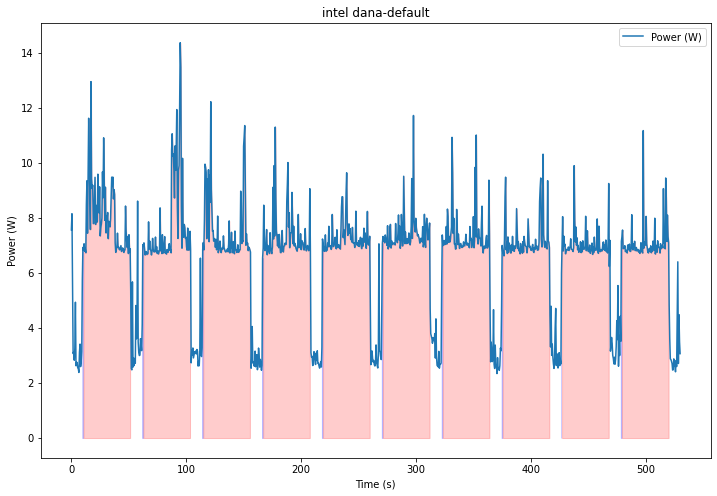

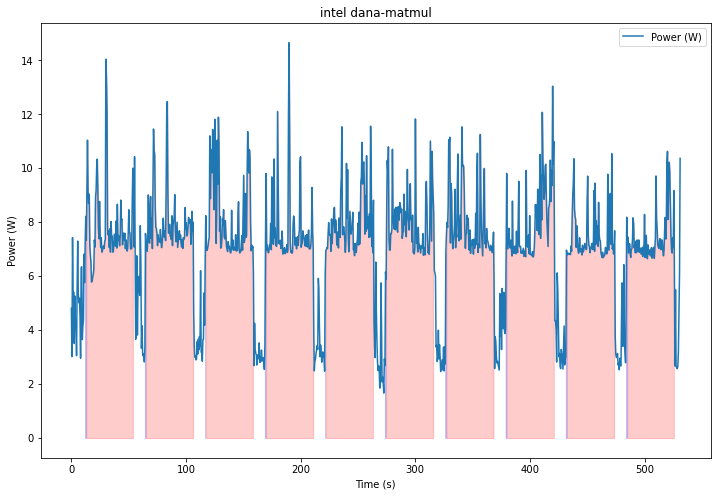

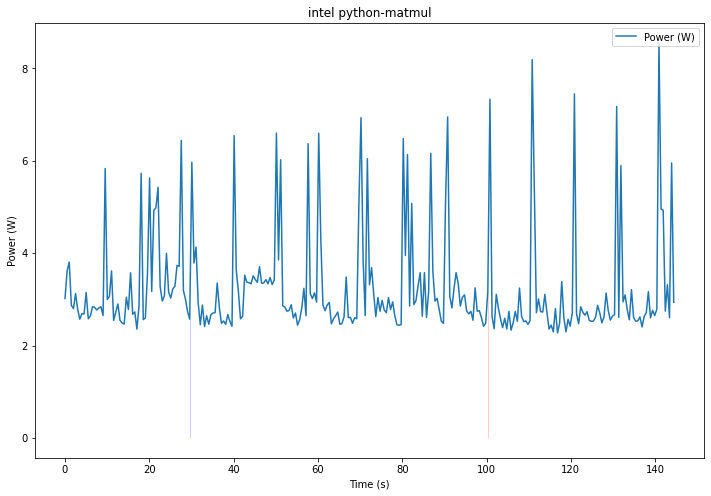

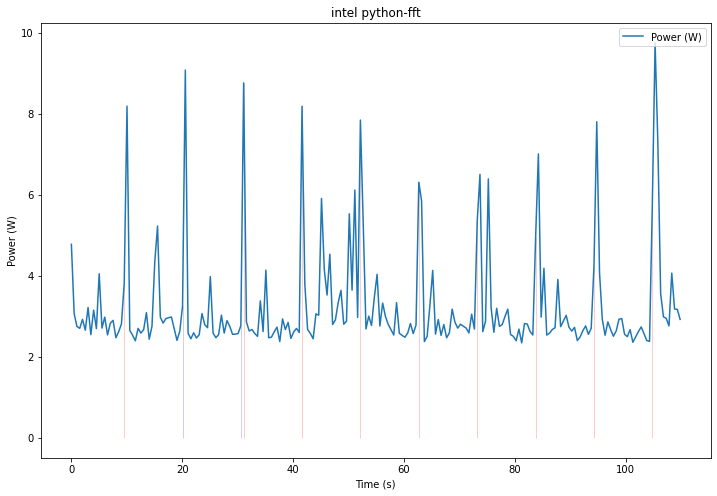

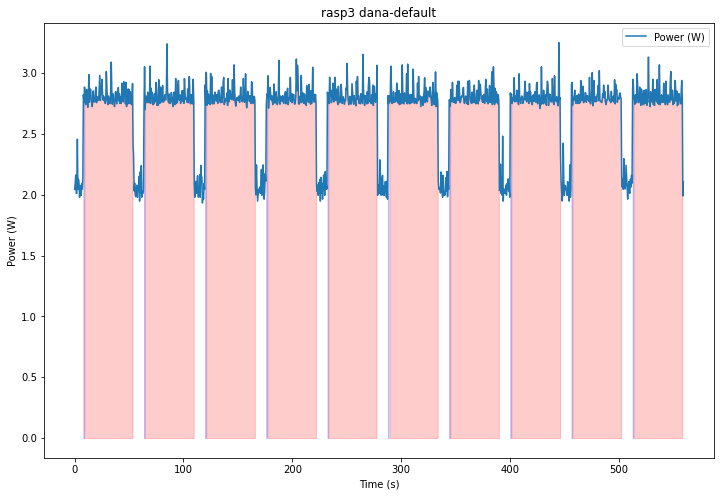

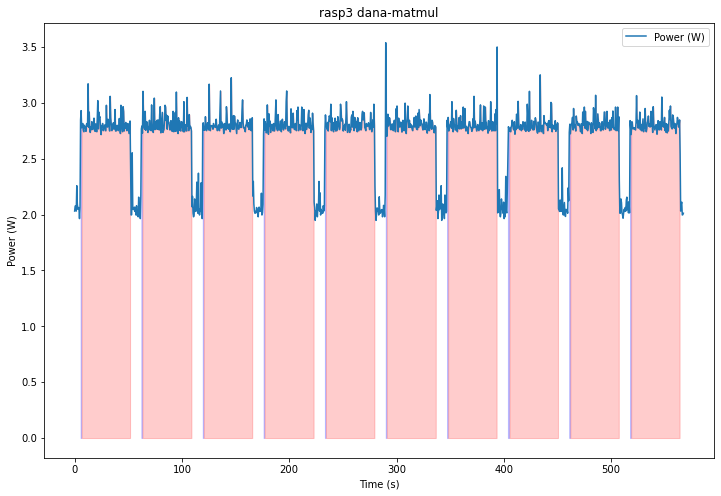

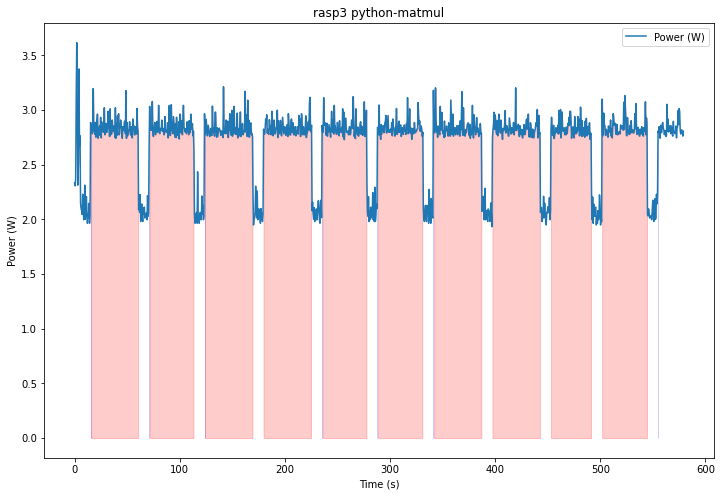

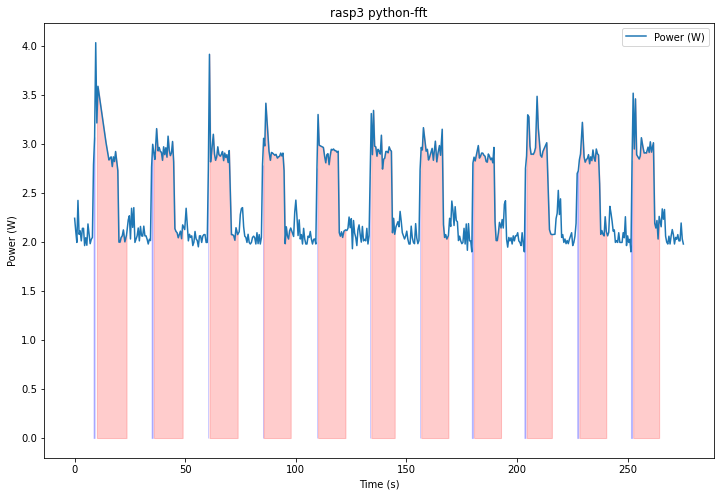

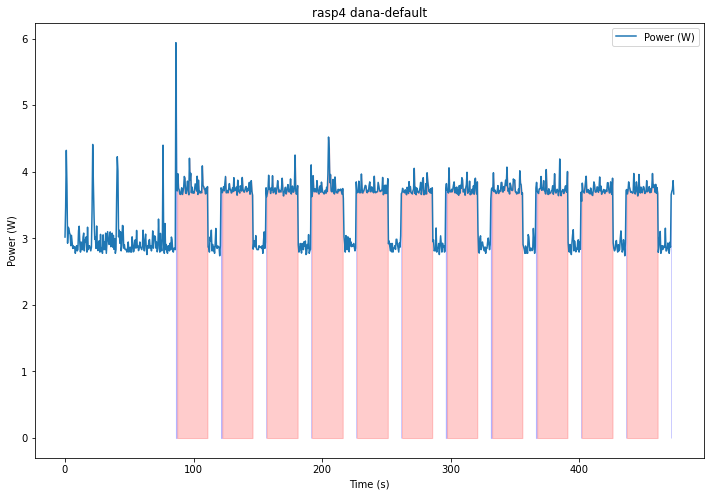

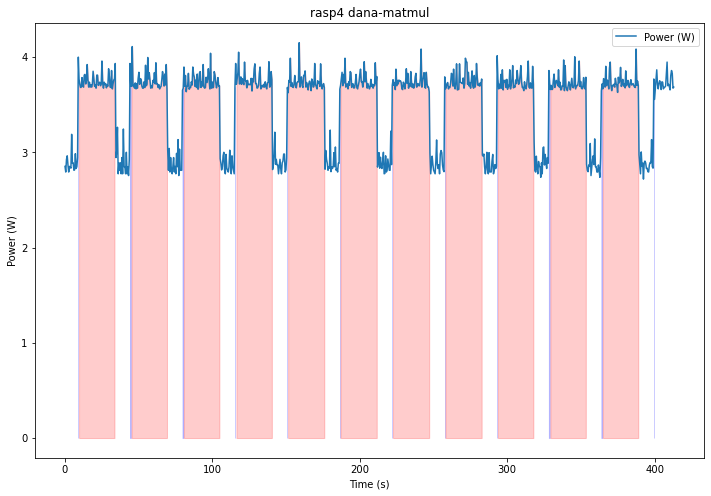

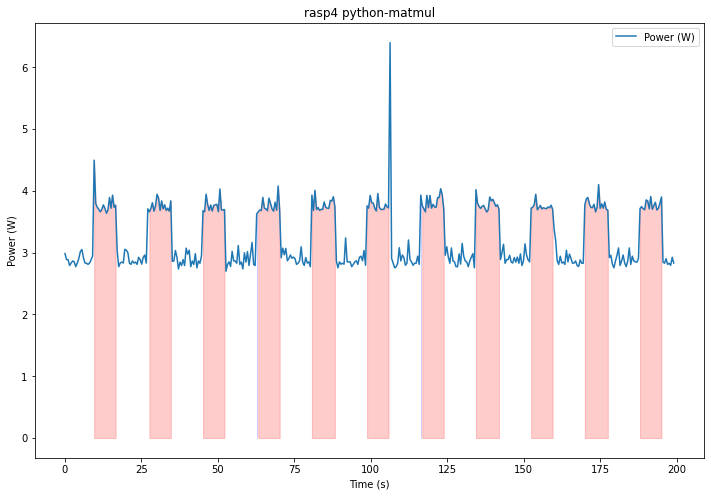

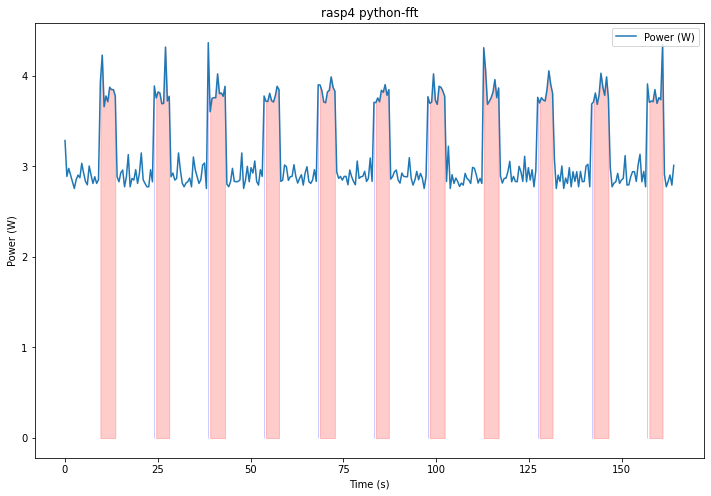

In [4]:
exps = [
    "intel_dana-default",
    "intel_dana-matmul",
    "intel_python-matmul",
    "intel_python-fft",
    "rasp3_dana-default",
    "rasp3_dana-matmul",
    "rasp3_python-matmul",
    "rasp3_python-fft",
    "rasp4_dana-default",
    "rasp4_dana-matmul",
    "rasp4_python-matmul",
    "rasp4_python-fft",
]

for exp in exps:
    power = read_power_data(f"outputs/{exp}_power.csv")
    regions = read_regions_data(f"outputs/{exp}_regions.csv")
    title = f"{exp.split('_')[0]} {exp.split('_')[1]}" 
    power_graph(power, title, regions)

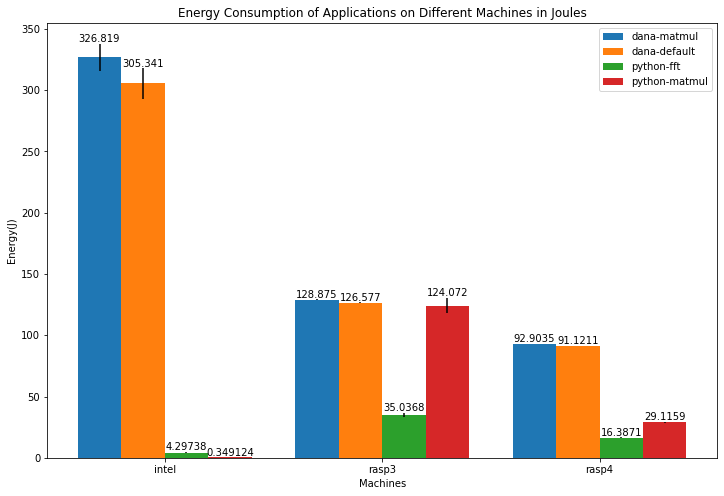

In [5]:
groups = ["intel", "rasp3", "rasp4"]
exps = ["dana-matmul", "dana-default", "python-fft", "python-matmul"]

results = []
err = []

for exp in exps:
    aux = []
    aux_err = []
    for group in groups:
        regions = read_regions_data(f"outputs/{group}_{exp}_regions.csv")
        mean, std = get_energy(regions)
        aux.append(mean)
        aux_err.append(std)
    results.append(aux)
    err.append(aux_err)

bar_graph(results, err, exps, groups, "Energy Consumption of Applications on Different Machines in Joules", "Energy(J)")

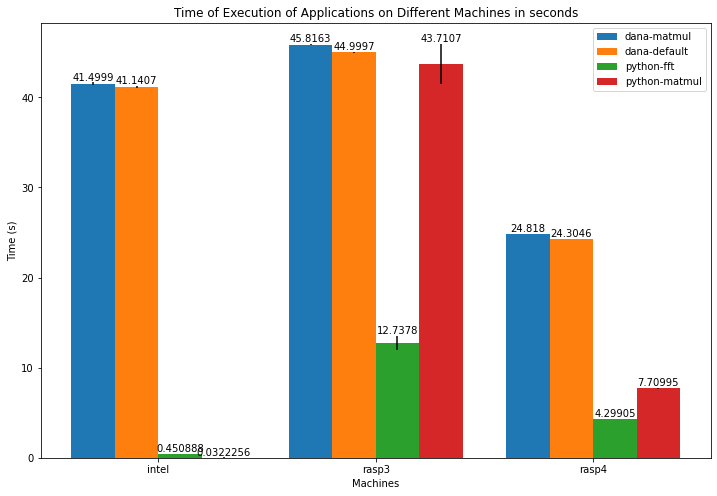

In [6]:
groups = ["intel", "rasp3", "rasp4"]
exps = ["dana-matmul", "dana-default", "python-fft", "python-matmul"]

results = []
err = []

for exp in exps:
    aux = []
    aux_err = []
    for group in groups:
        regions = read_regions_data(f"outputs/{group}_{exp}_regions.csv")
        mean, std = get_time(regions)
        aux.append(mean)
        aux_err.append(std)
    results.append(aux)
    err.append(aux_err)
bar_graph(results, err, exps, groups, "Time of Execution of Applications on Different Machines in seconds", "Time (s)")